**Introduction to Machine Learning: Probability Part 3**   
Topics Covered:
1. Maximum Likelihood Estimation (MLE)
2. Maximum a Posterior (MAP)

The five minute summary of MLE and MAP are that they are tools for estimating some parameter, denoted arbitrarily as $\theta$, in a statistical or machine learning model. The parameters are the inputs provided to build out the model.

**Quick Review**   
Shown below is Bayes Theorem, but instead of predicting different classes its being used to predict model parameter $\theta$ given the data vector X. 
   
   $$\color{Blue}{P(\theta|X)} = \frac{\color{Green}{P(X|\theta)}\color{Fuchsia}{P(\theta)}}{\color{Red}{P(X)}}$$    
$\color{Blue}{Posterior}$ - $\color{}{P(\theta|X)}$ Predicting value for $\theta$ given X    
$\color{Green}{Likelihood}$ - $\color{}{P(X|\theta)}$ Previous data on the value for X given $\theta$    
$\color{Fuchsia}{Prior}$ - $\color{}{P(\theta)}$ How has your predicted value been distributed in the past   
$\color{Red}{Evidence}$ - $\color{}{P(X)}$ How much supporting evidence do you have? Not very important

**Overall Concept**   
The concepts for MAP and MLE can be a little abstract at first pass. Naturally when first learning people have some very basic questions. They will be addressed below.
1. When to apply?   
a. MLE is applied when enough data **is collected** to explain the specific problem. For example if the dataset has 1000 samples then enough data has *probably* been gathered to create an MLE specific for parameters.   
b. MAP is applied when enough data **is not collected** to explain the specific problem. For example if the dataset has 5 samples then enough data *has not* been collected. MAP fixes the lack of data by pulling in an analogous prior distribution.

**Maximum Likelihood Estimate**   
$$\theta_{MLE}^{*}=\operatorname*{arg\,max}_\theta \prod_{n=1}^{N} P(X = x_{n}| \theta = \skew{3}\hat\theta)$$
The equation above states that $\theta_{MLE}$ is equal to the $\theta$ that maximizes the probability of making the data fit the model. X is a vector of observations, taking the form.   $$X = (x_{1},...,x_{N})$$ In the example a univariate Gaussian distribution is going to be investigated for the best fit of $\mu$. Parameter will be defined as $\theta$ = $\mu$ from the Gaussian Distribution. The Gaussian parameter $\sigma$ will be held constant.   
For a Gaussian distribution the likelihood function takes the shape. $$L(\mu, \sigma^{2}|x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} exp( - \frac{ (x - \mu)^2 } {2 \sigma^2} )$$ The Gaussian likelihood function is almost identical to the probability function. The key difference of likelihood is the data is given and the model parameters, $\mu$ and $\sigma$, are tested.   
   
   Applying the likelihood function across a vector takes the form. $$L(\mu,\sigma^{2}|X) = \prod_{n=1}^{N}\mathcal{N}(\mu,\sigma^{2}|x_{n})$$ Substituting $\theta$ for $\mu$, the equation can be rewritten as. For this example of MLE $\sigma$ is held constant. $$L(\theta,\sigma^{2}|X) = \prod_{n=1}^{N}\mathcal{N}(\theta,\sigma^{2}|x_{n})$$ The easiest way to maximize the above function is to find the location that the derivative of $\theta$ is zero. Without going into detail finding the derviative of products, $\prod$, is difficult. A log transformation greatly simplifies the problem while maintaining the maximized value. [Review log rules](https://www.rapidtables.com/math/algebra/Logarithm.html#log-rules)

The natural log likelihood function for the gaussian is written as follows. $$\ln{L(\theta, \sigma^{2}|X)} = -\frac{1}{2\sigma^{2}} \sum_{n=1}^{N}(x_{n}-\theta)^2 -\frac{N}{2}\ln{\sigma^{2}} -\frac{N}{2}\ln(2\pi)$$ Finding the maximum likelihood with respect to $\theta$ requires taking the partial derivative. $$\frac{\partial}{\partial\theta}\ln{L(\theta, \sigma^{2}|X)} = \frac{1}{\sigma^2}\sum_{n=1}^{N}(x_{n}-\theta)$$ Setting the partial derivatives equal to zero and solving for $\theta$. $$\theta = \mu_{MLE} = \frac{1}{N}\sum_{n=1}^{N}x_n$$ A visual representation is shown below.

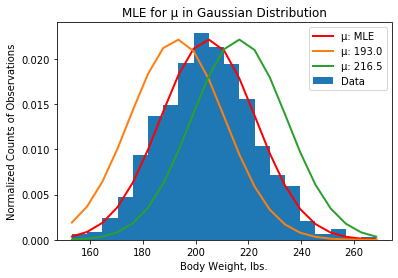

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# define a gaussian function
def gausspdf(x, mu, sigma):
    
    x = np.asarray(x)
    g_one = np.exp(-(x-mu)**2/(2*sigma**2))
    g_two = np.sqrt(2*np.pi*sigma**2)
       
    return g_one/g_two

# generate a random set of data with 
np.random.seed(36) # seed for consistency in examples
mle_data = np.random.normal(205, 17.5, 1000)

mle_mu = np.mean(mle_data)
mle_sd = np.std(mle_data)

count, bins, ignored = plt.hist(
    x=mle_data, bins=20, density=True, label='Data')

mle_gauss = gausspdf(bins, mle_mu, mle_sd)

plt.plot(
    bins, mle_gauss, 
    linewidth=2, color='r', 
    label='μ: MLE')

# make some bad fits of the mean data
bad_mu = [mle_mu-.65*mle_sd, mle_mu+.65*mle_sd]

for b_mu in bad_mu:
    plt.plot(
    bins, 
    gausspdf(bins, b_mu, mle_sd), 
    linewidth=2, 
    label='μ: {:.1f}'.format(b_mu))

plt.title('MLE for μ in Gaussian Distribution')    
plt.xlabel('Body Weight, lbs.')
plt.ylabel('Normalized Counts of Observations')
plt.legend()


plt.show()

In the above graph it is apparent that setting the $\mu$ parameter in a Gaussian distribution to the mean of the data provides the best fit. The other two provided values for $\mu$ do not provide as good of a fit. This seems like a very trivial application. The result here is not as important as the method applied.  In the example finding the MLE value of $\sigma$ was omitted. Even more model variations could be obtained if $\sigma$ was also adjusted.  
   
   Maximum likelihood will be used in future machine learning algorithms to find parameters. In this example it was accomplished with partial derivatives but that won't always be the case. New methods will have to be introduced or developed to find the maximum likelihood in the future. The case was trivial here, but they will progressively get more difficult.

**Maximum a Posterior**   
$$\theta_{MAP}^{*}=\operatorname*{arg\,max}_\theta \prod_{n=1}^{N} P(\theta = \skew{3}\hat\theta|X = x_{n})$$ The posterior is now the term to be maximized. Recalling the following: $$\color{}{posterior}\propto \color{}{likelihood} \times \color{}{prior}$$ The above equation can be rewritten as follows. $$\theta_{MAP}^{*}=\operatorname*{arg\,max}_\theta \prod_{n=1}^{N} P(X = x_{n}| \theta = \skew{3}\hat\theta)P(\theta = \skew{3}\hat\theta)$$ It can be seen the equation for MAP is similiar to MLE, with the addition of the prior term $P(\theta)$. Applying a log transformation to simplify the problem. $$\theta_{MAP}^{*}=\operatorname*{arg\,max}_\theta(log(\sum_{n=1}^{N} P(X = x_{n}| \theta = \skew{3}\hat\theta))+log(P(\theta = \skew{3}\hat\theta))$$ So what does the prior term do? It provides a method to include human intuition. Early deployments of a machine learning alorithm normally contain low sample sizes. Low sample sizes are susceptible to collection bias causing differences in predictive ability. A prior can be added to correct the small sample size bias and help the model provide reasonable results early on.   
   
   A table is generated in the next cell that shows different model parameters and how their prior's are distributed.

In [116]:
prior_dist = {
    'Bernoulli, p':'Beta',
    'Binomial, p': 'Beta', 
    'Poisson, λ':'Gamma',
    'Exponential, λ':'Gamma',
    'Multinomial, µ':'Dirichlet', 
    'Normal, µ':'Normal',
    'Normal, σ':'Inverse Gamma'
}
# find longest string from dictionary above
lpm = max(map(len, prior_dist.keys()))
lpd = max(map(len, prior_dist.values()))
spc = (lpm+lpd+2)*'-'

lpm = str(lpm)
lpd = str(lpd)
lps = '{:>'+lpm+'} | {:'+lpd+'}'

print(lps.format('Parameter','Prior Dist.'))
print(spc)
for key, val in prior_dist.items():
    print(lps.format(key, val))

     Parameter | Prior Dist.  
-----------------------------
  Bernoulli, p | Beta         
   Binomial, p | Beta         
    Poisson, λ | Gamma        
Exponential, λ | Gamma        
Multinomial, µ | Dirichlet    
     Normal, µ | Normal       
     Normal, σ | Inverse Gamma


The table states that the parameter on the left can be represented by the statistical distribution on the right. Conveniently the $\mu$ term from a Normal Gaussian distribution can also be represented by a Normal Gaussian distribution. The next section will address defining the **prior** for $\mu$, substituted as $\theta$, since the likelihood was defined in the MLE section. $$P(\theta) = \frac{1}{\sqrt{ 2 \pi \beta^2 }} exp( - \frac{ (\theta - \nu)^2 } {2 \beta^2} )$$ For clarity the prior terms for mean and standard deviation have been defined as $\nu$ and $\beta$ respectively. $\nu$ and $\beta$ are commonly referred to as **hyperparameters** meaning they *are not* learned from the model and are set by the human user. Performing a log transformation on the prior yields. $$\ln{P(\theta)} = -\frac{(\theta-\nu)^{2}}{2\beta^{2}}-\frac{\ln{\beta^{2}}}{2} -\frac{\ln(2\pi)}{2}$$ Taking the partial derivative yields. $$\frac{\partial}{\partial\theta}\ln{P(\theta)} = -\frac{\theta-\nu}{\beta^{2}}$$ Combining the partial derivative from the MLE with the prior yields the following log posterior partial derivative. $$\frac{\partial}{\partial\theta}\ln{P(\theta|X)} = \frac{1}{\sigma^2}\sum_{n=1}^{N}(x_{n}-\theta)-\frac{\theta-\nu}{\beta^{2}}$$ Setting the derivate to zero. $$ 0 = \frac{1}{\sigma^2}\sum_{n=1}^{N}(x_{n}-\theta)-\frac{\theta-\nu}{\beta^{2}}$$ Solving for theta yields: $$\theta = \mu_{MAP} = \frac{\sigma^{2}\nu + \beta^{2}\sum_{n=1}^{N}x_{n}}{\sigma^2+N\beta^2}$$ Now that $\mu_{MAP}$ has been defined it will be applied below.

**MAP Application Example**   
Imagine data is being gathered on human weight in the USA. A very limited amount of data can be collected before the model needs to be deployed. Luckily data will continue being collected even after the model is implemented. A previous data set exists for male European weights. The parts of the problem are defined below. A graph is generated showing how the MAP and MLE values of $\mu$ change as more data is gathered.   
1. Sample set - USA male gathered weights (In Progress)   
2. Prior set - European male gathered weights (Finalized Dataset)

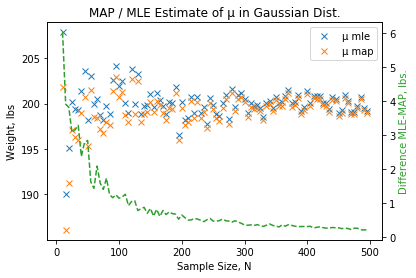

In [75]:
eu_vu = 160 # European average weight, lbs
eu_bt = 10 # European standard deviation weight, lbs.

# define MAP function for mu
def mu_map(x, vu, beta):
    """
    Calculate mu MAP (maximum a posterior)
    x - an array of data
    vu - mean of prior distribution, hyperparameter
    beta - standard deviation of prior distribution, hyperparameter
    """
    x = np.asarray(x)
    N = len(x)
    x_sig = np.std(x)
    x_sum = np.sum(x)
    
    m_one = x_sig**2*vu + beta**2*x_sum
    m_two = x_sig**2 + N*beta**2
    
    return m_one/m_two

# generate an array of varying sample sizes
s_size = np.arange(10, 500, 5)
s_mu_mle = []
s_mu_map = []

# used to generate random data
us_mu = 200
us_sd = 17.5

np.random.seed(42) # seed for consistency in examples

for s in s_size:
    
    us_data = np.random.normal(us_mu, us_sd, s)
    s_mu_mle.append(np.mean(us_data))
    s_mu_map.append(mu_map(us_data, eu_vu, eu_bt))

s_mu_mle = np.asarray(s_mu_mle)
s_mu_map = np.asarray(s_mu_map)

s_mu_dif = s_mu_mle-s_mu_map

fig, ax1 = plt.subplots()
ax1.set_xlabel('Sample Size, N')
ax1.set_ylabel('Weight, lbs')
ax1.plot(s_size, s_mu_mle, ls='', marker='x', label='μ mle')
ax1.plot(s_size, s_mu_map, ls='', marker='x', label='μ map')
ax1.legend()

ax2 = ax1.twinx()
color='tab:green'
ax2.set_ylabel('Difference MLE-MAP, lbs.', color=color)
ax2.plot(s_size, s_mu_dif, color=color, ls='--', label='Difference')

plt.title('MAP / MLE Estimate of μ in Gaussian Dist.')
plt.show()

Inspecting the graph reveals the key aspect of incorporating a prior distribution. While the sample size is low the MAP value is pulled towards the prior and hyperparameters. As the sample size increases the value for MAP moves closer to the MLE. The prior effectlively provides "protection" from erroneous data early on in sampling. Additionally, if the prior provided is incorrect its impact is effectively removed as the sample size increases.   
   
   This concludes the discussion on MAP and MLE. As stated before, the following is just one example of how MLE and MAP can be applied. It will continue to be brought up as an effective means for calculating machine learning parameters. The important take away is MLE is applied once data confidence has been obtained, MAP can be applied to help correct discrepancies from early sampling.   
      
   **References:**   
MLE/MAP for Binomial Distribution [Github](https://zhiyzuo.github.io/MLE-vs-MAP/)   
StatQuest MLE for $\mu$ and $\sigma$ in Normal Distribution [YouTube](https://www.youtube.com/watch?v=Dn6b9fCIUpM&t=1s)   
MathMonk MAP for $\mu$ in Normal Distribution [YouTube](https://www.youtube.com/watch?v=KogqeZ_88-g&t=8s)